# Musical Composer Prediction - Group 8

Contributors: Bhupal Lambodhar, Aaron Ramirez, Elan Wilkinson

* Files lost in the transfer:
* Bwv802 Four Inventions (Duettos) Clavier-U"bung III n1.mid
* 10.Wir setzen uns mit Tra"nen nieder chorus.mid
* 7.Ko"nnen Tra"nen meiner Wangen nichts erlangen Alto Aria.mid
* Auf der See fu"r Harmonioum und Klavier OP 21.2.mid
* Elegie (Fantasiestu"ck fu"r Harmonium und Klavier)OP. 21 No 1.mid
* Klavierstu"ck 2, Opus.19.mid
* Klavierstu"ck 6, Opus.19.mid
* 13 Variations on a Theme by Anselm Hu"ttenbrenner D5761var.mid
* 13 Variations on a Theme by Anselm Hu"ttenbrenner D5762var.mid
* 13 Variations on a Theme by Anselm Hu"ttenbrenner D5763var.mid
* 13 Variations on a Theme by Anselm Hu"ttenbrenner D576Theme.mid
* Die scho"ne Mu"llerin D795 op25 n1 Das Wandern.mid
* Erlko"nig D328 op1.mid
* Concertstu"ck for Piano and Orchestra op92.mid
* Fantasiestu"cke op12 n1 Des Abends.mid
* Fru"hlingsrauschen (Rustle of Spring), opus.23 No.3.mid
* Myrthenblue"ten (Myrtle Blossoms, opus 395).mid
* Min a"lskling.mid
* Meistersinger von Nu"rnberg.mid

In [3]:
import pretty_midi
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import librosa.display


In [11]:
def check_directory_structure(dataset_path):
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if not file.lower().endswith('.mid'):
                print(f"Unexpected file found: {os.path.join(root, file)}")
        for dir in dirs:
            if not os.path.isdir(os.path.join(root, dir)):
                print(f"Unexpected directory found: {os.path.join(root, dir)}")


In [12]:

dataset_path = './full_data/midiclassics'  # Replace with your dataset path
check_directory_structure(dataset_path)


Unexpected file found: ./full_data/midiclassics\Bach\Bwv001- 400 Chorales\readme
Unexpected file found: ./full_data/midiclassics\Beethoven\Complete Sonata in A flat major Op.110.zip
Unexpected file found: ./full_data/midiclassics\Beethoven\Complete Tempest Sonata.zip
Unexpected file found: ./full_data/midiclassics\Beethoven\Piano and Cello Sonata No.2 Op 5.zip
Unexpected file found: ./full_data/midiclassics\Beethoven\Piano Sonata No.18.zip
Unexpected file found: ./full_data/midiclassics\Beethoven\Piano Sonata No.23.zip
Unexpected file found: ./full_data/midiclassics\Beethoven\Sonata No.1 in D.zip
Unexpected file found: ./full_data/midiclassics\Busoni\Chacona in D, with variations.zip
Unexpected file found: ./full_data/midiclassics\Busoni\Piano Concerto, Mov.1. A beautiful piece.zip
Unexpected file found: ./full_data/midiclassics\Busoni\Piano Concerto, Mov.3. A wonderful piece.zip
Unexpected file found: ./full_data/midiclassics\Busoni\Piano Concerto, Mov.4. Another wonderful piece.zip
U

In [19]:
def check_directory_structure_and_create_label_mapping(dataset_path):
    label_mapping = {}
    label_index = 0

    for root, dirs, files in os.walk(dataset_path):
        # Check if the root directory itself should be ignored
        if root == dataset_path:
            continue

        # Extract the composer name from the directory path
        composer_name = os.path.basename(root)
        if composer_name not in label_mapping:
            label_mapping[composer_name] = label_index
            label_index += 1

        # Check files in the current directory
        for file in files:
            if not file.lower().endswith('.mid'):
                print(f"Unexpected file found. IT WILL BE IGNORED: {os.path.join(root, file)}")

        # Check subdirectories
        for dir in dirs:
            if not os.path.isdir(os.path.join(root, dir)):
                print(f"Unexpected directory found:  {os.path.join(root, dir)}")

    return label_mapping


In [20]:
label_mapping = check_directory_structure_and_create_label_mapping(dataset_path)
print(label_mapping)


Unexpected file found. IT WILL BE IGNORED: ./full_data/midiclassics\Bach\Bwv001- 400 Chorales\readme
Unexpected file found. IT WILL BE IGNORED: ./full_data/midiclassics\Beethoven\Complete Sonata in A flat major Op.110.zip
Unexpected file found. IT WILL BE IGNORED: ./full_data/midiclassics\Beethoven\Complete Tempest Sonata.zip
Unexpected file found. IT WILL BE IGNORED: ./full_data/midiclassics\Beethoven\Piano and Cello Sonata No.2 Op 5.zip
Unexpected file found. IT WILL BE IGNORED: ./full_data/midiclassics\Beethoven\Piano Sonata No.18.zip
Unexpected file found. IT WILL BE IGNORED: ./full_data/midiclassics\Beethoven\Piano Sonata No.23.zip
Unexpected file found. IT WILL BE IGNORED: ./full_data/midiclassics\Beethoven\Sonata No.1 in D.zip
Unexpected file found. IT WILL BE IGNORED: ./full_data/midiclassics\Busoni\Chacona in D, with variations.zip
Unexpected file found. IT WILL BE IGNORED: ./full_data/midiclassics\Busoni\Piano Concerto, Mov.1. A beautiful piece.zip
Unexpected file found. IT W

In [4]:
def get_midi_files(folder_path):
    midi_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.mid'):
                midi_files.append(os.path.join(root, file))
    return midi_files

In [13]:
bach_midi_files = get_midi_files('data/Bach')
beethoven_midi_files = get_midi_files('data/Beethoven')
chopin_midi_files = get_midi_files('data/Chopin')
mozart_midi_files = get_midi_files('data/Mozart')

In [19]:
def Convert_to_midi(files):
    midi_files = []
    for file in files:
        try:
            midi = pretty_midi.PrettyMIDI(file)
            midi_files.append(midi)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
    return midi_files


In [20]:
bach_midis = Convert_to_midi(bach_midi_files)
beethoven_midis = Convert_to_midi(beethoven_midi_files)
chopin_midis = Convert_to_midi(chopin_midi_files)
mozart_midis = Convert_to_midi(mozart_midi_files)

c:\Users\elanw\anaconda3\Lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Error processing file data/Beethoven\Anhang 14-3.mid: Could not decode key with 3 flats and mode 255
Error processing file data/Mozart\Piano Sonatas\Nueva carpeta\K281 Piano Sonata n03 3mov.mid: Could not decode key with 2 flats and mode 2


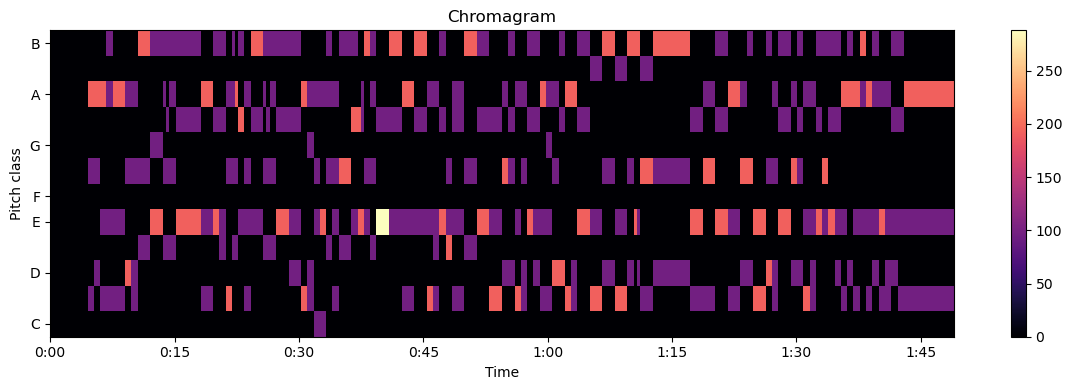

In [26]:
# Get the MIDI data as a sequence of chroma vectors
# then plot these chroma vectors using librosa
# to visualize the chromagram

def get_chroma(midi):
    chroma = midi.get_chroma()
    return chroma

def plot_chroma(chroma):
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chromagram')
    plt.tight_layout()
    plt.show()


# Test using the first midi from the bach_midis
plot_chroma(get_chroma(bach_midis[0]))

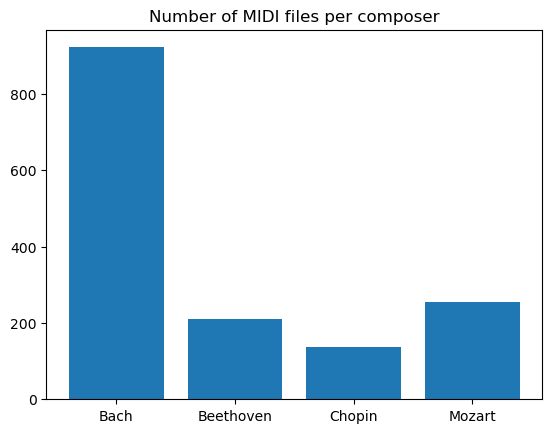

In [30]:
# creat barchart of counts of midis in each composer

composers = ['Bach', 'Beethoven', 'Chopin', 'Mozart']
counts = [len(bach_midis), len(beethoven_midis), len(chopin_midis), len(mozart_midis)]
plt.bar(composers, counts)
plt.title('Number of MIDI files per composer')
plt.show()



Text(0.5, 1.0, 'Synthesized audio')

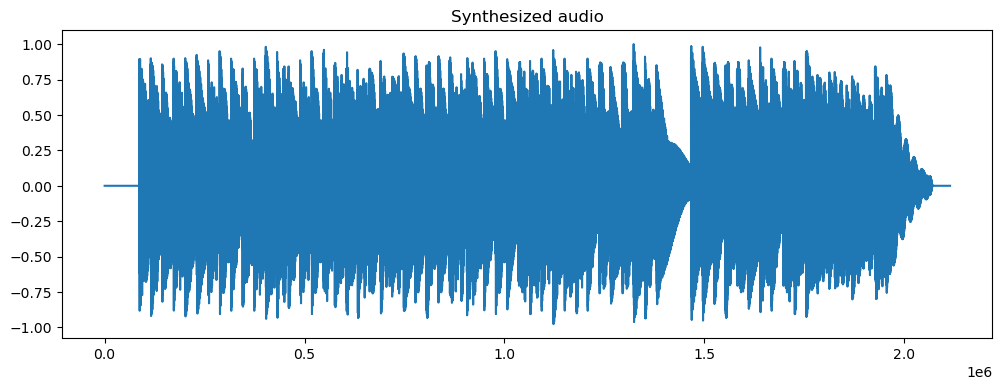

In [58]:
# Plot the synthesized waveform of the first MIDI file
plt.figure(figsize=(12, 4))
plt.plot(bach_midis[0].synthesize())
plt.title('Synthesized audio')



Text(0, 0.5, 'Estimated Tempo')

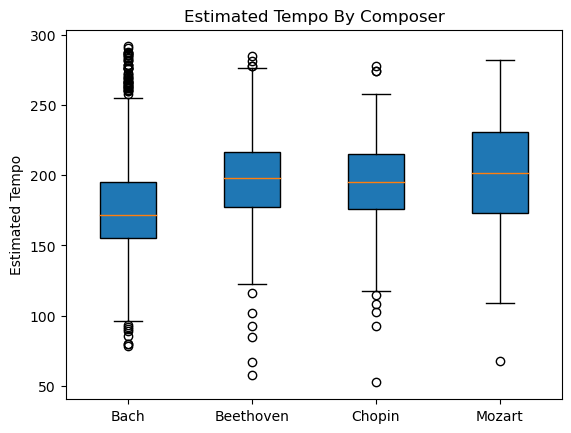

In [57]:
# Plot the estimated tempo boxplot for midis per composer

bach_tempos = [get_tempo(midi) for midi in bach_midis]
beethoven_tempos = [get_tempo(midi) for midi in beethoven_midis]
chopin_tempos = [get_tempo(midi) for midi in chopin_midis]
mozart_tempos = [get_tempo(midi) for midi in mozart_midis]

plt.boxplot([bach_tempos, beethoven_tempos, chopin_tempos, mozart_tempos], patch_artist=True)
plt.xticks([1, 2, 3, 4], ['Bach', 'Beethoven', 'Chopin', 'Mozart'])
plt.title('Estimated Tempo By Composer')
plt.ylabel('Estimated Tempo')

plt.show()